<b>¬°Hola Natalia!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuaci√≥n, encontrar√°s mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de sem√°foro. Por favor, <b>no las borres ni muevas de posici√≥n</b> mientras dure el proceso de revisi√≥n.

<div class="alert alert-block alert-success">
<b>√âxito</b> <a class="tocSkip"></a>
En celdas verdes encontrar√°s comentarios en relaci√≥n a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antenci√≥n</b> <a class="tocSkip"></a>
Utilizar√© el color amarillo para llamar tu atenci√≥n, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitir√© aquellos puntos que deber√°s atender para aprobar la revisi√≥n.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisi√≥n, quieras dejarme comentarios. Si es el caso, por favor real√≠zalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisi√≥n, tu proyecto ser√° aceptado una vez que los comentarios en rojo hayan sido atendidos.
¬°Empecemos!

# Proyecto del M√≥dulo 2: An√°lisis de comportamiento del Usuario

## Introducci√≥n


En este proyecto, analizamos el comportamiento de los usuarios en la aplicaci√≥n de una empresa de productos alimenticios, con un enfoque en el embudo de conversi√≥n y los resultados de un experimento A/A/B.

Primero, evaluamos el embudo de eventos para identificar cu√°ntos usuarios avanzan en cada etapa del proceso de compra y en qu√© puntos se produce la mayor p√©rdida de usuarios. Luego, realizamos un test A/A/B para determinar si un cambio en la tipograf√≠a de la aplicaci√≥n afecta la interacci√≥n de los usuarios. Para ello, comparamos la frecuencia de eventos clave en dos grupos de control y un grupo de prueba utilizando pruebas de hip√≥tesis estad√≠sticas.



### Objetivo

Verificar la validez del experimento y determinar si la nueva tipograf√≠a tiene un impacto significativo en el comportamiento de los usuarios.

## Exploraci√≥n y correcci√≥n de datos

In [1]:
# Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
# Lectura de los archivos
data = pd.read_csv('/datasets/logs_exp_us.csv', sep="\t" )


In [3]:
#Informaci√≥n de los datasets
data.info()
print()
display(data.describe())
print()
display(data. head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB



DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+09     248.000000

EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Los datos nos muestran las acciones que tomaron los clientes. La columna EventName muestra el evento, la columna DeviceIDHash es un identificador de usuario, el EventTimestamp muestra la hora en la que pas√≥ y el ExpID muestra a qu√© grupo pertenecen en la prueba A/A/B. Se puede ver que no hay datos nulos en ninguna columna.
Para preparar estos datos para el an√°lisis es necesario comprobar la exsistencia de duplicados, cambiar los nombres de las columnas a snake_case para tener mejor estructura, cambiar el tipo de datos del Timestamp a tipo datetime y separar la fecha de la hora. 


### Limpieza y correcci√≥n de datos

In [4]:
#Duplicados
print("Duplicados en Data: ", data.duplicated().sum())
print()
data.drop_duplicates(inplace = True)

#cambiar nombres de columnas
data.columns= ['event_name','device_id','timestamp', 'exp_id']

#tipos de datos
data['timestamp'] = pd.to_datetime(data['timestamp'], unit = 's')

#separar fecha y hora
data['event_date'] = data['timestamp'].dt.date
data['event_date'] = pd.to_datetime(data['event_date'])


Duplicados en Data:  413



<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a>
La limpieza de datos es adecuada: se eliminan duplicados, se corrigen nombres de columnas y se convierten tipos de datos correctamente.</div>


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a>
Podr√≠as optimizar la conversi√≥n de fechas y evitar crear una nueva columna innecesaria. En lugar de:

<code>
data['event_date'] = data['timestamp'].dt.date  
data['event_date'] = pd.to_datetime(data['event_date'])  
</code>

Puedes directamente usar:

<code>
data['event_date'] = data['timestamp'].dt.floor('D')  
</code>

Esto reduce redundancia y mejora eficiencia.</div>


In [5]:
# Verificar cambios
display(data.info())
print("Duplicados en Data: ", data.duplicated().sum())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   device_id   243713 non-null  int64         
 2   timestamp   243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
 4   event_date  243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


None

Duplicados en Data:  0


event_name            device_id           timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   

  event_date  
0 2019-07-25  
1 2019-07-25  
2 2019-07-25  
3 2019-07-25  
4 2019-07-25

Ahora tenemos los datos limpios con nombres f√°ciles de manejar, tipos de datos correctos y sin duplicados para poder pasar a la siguiente parte del an√°lisis.

## Estudiar y comprobar los datos


In [16]:
#An√°lisis exploratorio
print("N√∫mero total de eventos:", data['event_name'].count())
print("N√∫mero total de usuarios √∫nicos:", data['device_id'].nunique())
print("Eventos promedio por usuario:", data['event_name'].count() / data['device_id'].nunique())
print("Periodo de tiempo:", data['event_date'].min(), " - ", data['event_date'].max())
print('Usuarios por experimento:')
print(data["exp_id"].value_counts())


N√∫mero total de eventos: 243713
N√∫mero total de usuarios √∫nicos: 7551
Eventos promedio por usuario: 32.27559263673685
Periodo de tiempo: 2019-07-25 00:00:00  -  2019-08-07 00:00:00
Usuarios por experimento:
248    85582
246    80181
247    77950
Name: exp_id, dtype: int64


Aqui podemos ver que hay 7,551 usuarios y que realizaron 243,713 eventos en total, promediando 32 eventos por usuario entre el 25 de julio y el 7 de agosto 2019. Vamos a visualizar los eventos dentro de las fechas para comprobar que tenemos los datos importantes en los que se aplic√≥ la prueba

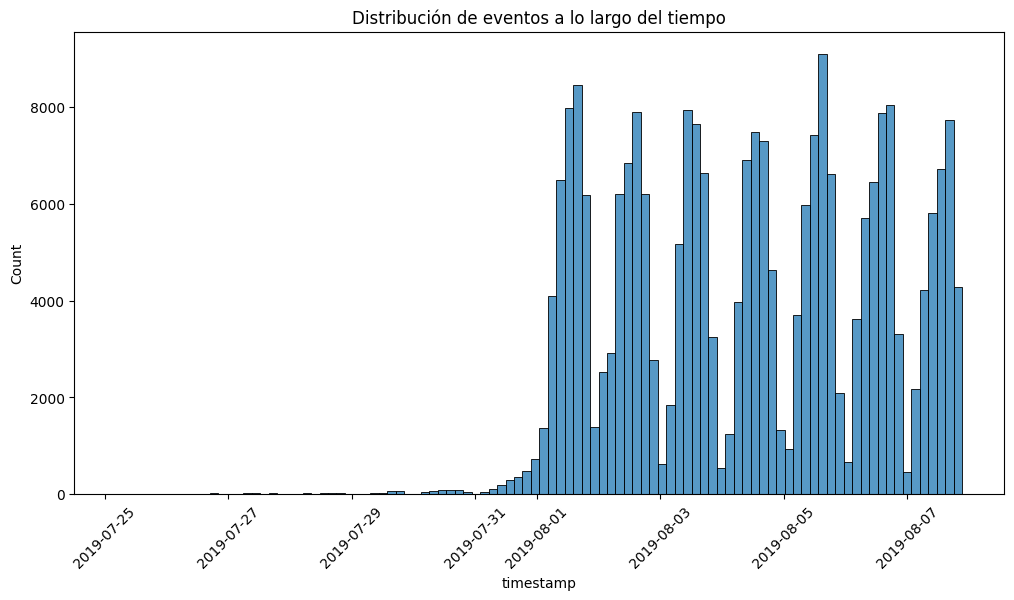

In [7]:
# Visualizar distribuci√≥n de eventos por fecha
plt.figure(figsize=(12, 6))
sns.histplot(data['timestamp'], bins=100)
plt.title("Distribuci√≥n de eventos a lo largo del tiempo")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a>
La visualizaci√≥n de eventos a lo largo del tiempo es √∫til para identificar el inicio real del experimento. Filtrar desde el 1 de agosto mejora la validez del an√°lisis.</div>


En el gr√°fico se observa que los eventos no se estabilizan hasta el 1 de agosto, esto puede indicar que este d√≠a se comenz√≥ la prueba de ofertas y los dias anteriores est√°n modificando los datos. Se deben filtrar los datos y comarar las m√©tricas con la exploraci√≥n inicial.

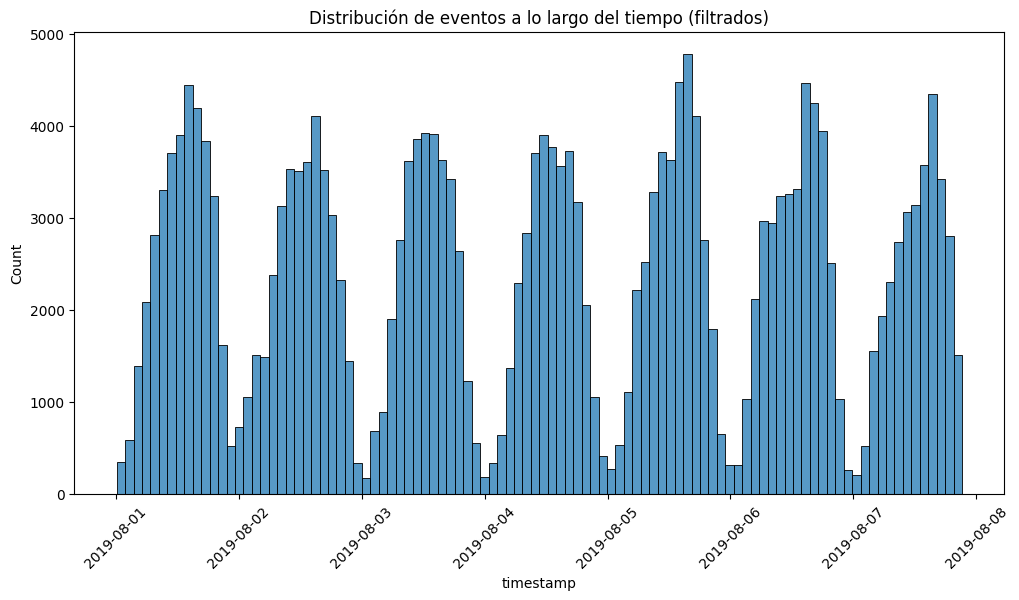

In [46]:
#filtrar datos desde la fecha que se estabilizan los pedidos
df_filtered = data[data['timestamp'] >= '2019-08-01']

# Visualizar distribuci√≥n de eventos por fecha de datos filtrados
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['timestamp'], bins=100)
plt.title("Distribuci√≥n de eventos a lo largo del tiempo (filtrados)")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-warning">
<b>Celda [46]</b> <a class="tocSkip"></a>
El filtro <code>df_filtered = data[data['timestamp'] >= '2019-08-01']</code> puede incluir registros justo al inicio del d√≠a sin diferenciar la hora.  
Si deseas filtrar exactamente desde el inicio del experimento, podr√≠as hacer:

<code>
df_filtered = data[data['timestamp'] >= pd.Timestamp('2019-08-01 00:00:00')]
</code>

Esto garantiza que no se excluyan datos relevantes por error.</div>


In [47]:
#Comparar cuantos usuarios hay y de que grupos son ya filtrados
print("N√∫mero total de eventos:", df_filtered['event_name'].count())
print("N√∫mero total de usuarios √∫nicos:", df_filtered['device_id'].nunique())
print("Eventos promedio por usuario:", df_filtered['event_name'].count() / df_filtered['device_id'].nunique())
print("Periodo de tiempo:", df_filtered['event_date'].min(), " - ", df_filtered['event_date'].max())
print('Usuarios por experimento:')
print(df_filtered["exp_id"].value_counts())

N√∫mero total de eventos: 240887
N√∫mero total de usuarios √∫nicos: 7534
Eventos promedio por usuario: 31.97332094504911
Periodo de tiempo: 2019-08-01 00:00:00  -  2019-08-07 00:00:00
Usuarios por experimento:
248    84563
246    79302
247    77022
Name: exp_id, dtype: int64


En comparaci√≥n con los datos que incluyen fechas anteriores, en los datos filtrados tenemos 7,534 usuarios, es decir s√≠ se excluyen algunos usuarios. El numero de eventos se redujo de 243,713 a 240,887 y el promedio de eventos por usuario se quedo pr√°cticamente igual. Tambi√©n es importante notar que se cuenta con suficientes datos de cada experimento, por lo que podemos proceder con el an√°lisis con los datos filtrados.

## Embudo de eventos

Para el an√°lisis del embudo, primero debemos ver qu√© valores hay en esta categor√≠a y cuantas veces aparece cada evento.

In [19]:
# Contar la cantidad de eventos √∫nicos
event_counts = df_filtered["event_name"].value_counts()

# Mostrar los eventos
event_counts


MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Visualizamos aqu√≠ el conteo de eventos que hay en el embudo. Podemos ver que la pantalla principal es la fase con mayor incidencia, despu√©s mostrar la oferta, el carrito y la confirmaci√≥n de compra. El evento con menos incidencias es el tutorial, podr√≠a ser porque gran parte de los clientes no lo necesita y es por esto que no es parte del embudo real. A continuaci√≥n se crea un data frame con el embudo y su conversi√≥n al siguiente paso.

In [20]:
# Contar usuarios √∫nicos en cada etapa del embudo
funnel_stages = {
    "MainScreenAppear": df_filtered[df_filtered["event_name"] == "MainScreenAppear"]["device_id"].nunique(),
    "OffersScreenAppear": df_filtered[df_filtered["event_name"] == "OffersScreenAppear"]["device_id"].nunique(),
    "CartScreenAppear": df_filtered[df_filtered["event_name"] == "CartScreenAppear"]["device_id"].nunique(),
    "PaymentScreenSuccessful": df_filtered[df_filtered["event_name"] == "PaymentScreenSuccessful"]["device_id"].nunique()
}

# Convertir en DataFrame para mejor visualizaci√≥n
funnel_df = pd.DataFrame.from_dict(funnel_stages, orient="index", columns=["Unique Users"])

# Calcular tasas de conversi√≥n entre etapas
funnel_df["Conversion Rate (%)"] = funnel_df["Unique Users"].pct_change().fillna(1) * 100
funnel_df["Next Step Conversion (%)"] = (funnel_df["Unique Users"] / funnel_df["Unique Users"].shift(1)).fillna(1) * 100


# Mostrar resultados
funnel_df


Unique Users  Conversion Rate (%)  \
MainScreenAppear                 7419           100.000000   
OffersScreenAppear               4593           -38.091387   
CartScreenAppear                 3734           -18.702373   
PaymentScreenSuccessful          3539            -5.222282   

                         Next Step Conversion (%)  
MainScreenAppear                       100.000000  
OffersScreenAppear                      61.908613  
CartScreenAppear                        81.297627  
PaymentScreenSuccessful                 94.777718

<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a>
El an√°lisis del embudo es correcto y bien estructurado. Se identifican las tasas de conversi√≥n, resaltando el punto cr√≠tico donde m√°s usuarios abandonan la compra.</div>


<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a>
Considera visualizar el embudo con `seaborn.barplot()` para representar gr√°ficamente las tasas de conversi√≥n:

<code>
plt.figure(figsize=(10,5))  
sns.barplot(x=funnel_df.index, y=funnel_df['Unique Users'], color="blue")  
plt.title("Usuarios en cada etapa del embudo")  
plt.show()
</code>

Esto facilitar√≠a la interpretaci√≥n de los resultados.</div>


Partimos de la p√°gina principal con el 100% de los usuarios, despu√©s se va reduciendo el numero de usuarios que avanzan en el embudo. El 62% pasan a la oferta en pantalla, de los cuales el 81% pasa a su carrito de compra, de los cuales el 94% completa su pedido.
La etapa que pierde m√°s usuarios es de la primera a la segunda, con una p√©rdida del 38.09%.

In [24]:
# Contar la frecuencia de cada evento y ordenarlos
event_frequencies = df_filtered["event_name"].value_counts().reset_index()
event_frequencies.columns = ["event_name", "count"]

# Contar la cantidad de usuarios √∫nicos que realizaron cada evento
unique_users_per_event = df_filtered.groupby("event_name")["device_id"].nunique().reset_index()
unique_users_per_event.columns = ["event_name", "unique_users"]

# Calcular la proporci√≥n de usuarios que realizaron cada acci√≥n
unique_users_per_event['user_proportion'] = (unique_users_per_event["unique_users"] / (df_filtered["device_id"].nunique())) * 100

# Unir tablas para ver frecuencia y usuarios 
event_analysis = event_frequencies.merge(unique_users_per_event, on="event_name")

# Ordenar 
event_analysis = event_analysis.sort_values(by="unique_users", ascending=False)

display(event_analysis)


event_name   count  unique_users  user_proportion
0         MainScreenAppear  117328          7419        98.473586
1       OffersScreenAppear   46333          4593        60.963632
2         CartScreenAppear   42303          3734        49.561986
3  PaymentScreenSuccessful   33918          3539        46.973719
4                 Tutorial    1005           840        11.149456

En este an√°lisis de los eventos vemos en qu√© proporcion los usuarios totales pasaron por cada etapa. 98.5% utilizaron la pagina principal, 60% vieron la oferta, 49% vieron su carrito de compra y 46% de los usuarios totales hicieron una compra. S√≥lamente 11% de los usuarios utiliz√≥ el tutorial. 

## Resultados del experimento

### Comparar grupos de control

Primero, para analizar la significancia de la prueba, es necesariocomparar los grupos control (246 y 247) por lo que se debe calcular cu√°ntos usuarios √∫nicos hay en cada grupo experimental.


In [26]:
# Contar la cantidad de usuarios √∫nicos en cada grupo 
users_per_group = df_filtered.groupby("exp_id")["device_id"].nunique().reset_index()
users_per_group.columns = ["exp_id", "unique_users"]

display(users_per_group)


exp_id  unique_users
0     246          2484
1     247          2513
2     248          2537

Los tres grupos tienen un n√∫mero similar de usuarios, lo cual es bueno porque significa que la aleatorizaci√≥n probablemente funcion√≥ bien y que se pueden comparar las muestras.

Ahora, hay que verificar si los grupos de control (246 y 247) tienen diferencias significativas.

1. Elegimos un evento popular (por ejemplo, MainScreenAppear).
2. Vemos cu√°ntos usuarios en cada grupo realizaron ese evento.
3. Comparamos usando una prueba estad√≠stica para ver si hay diferencias significativas.

In [30]:
# Elegimos un evento clave, por ejemplo, 'MainScreenAppear'
event_name = "MainScreenAppear"

# Contar usuarios √∫nicos que realizaron el evento en cada grupo de control (246 y 247)
users_246 = df_filtered[(df_filtered["exp_id"] == 246) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
users_247 = df_filtered[(df_filtered["exp_id"] == 247) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()

# Total de usuarios en cada grupo
total_246 = users_per_group[users_per_group["exp_id"] == 246]["unique_users"].values[0]
total_247 = users_per_group[users_per_group["exp_id"] == 247]["unique_users"].values[0]

# Crear tabla de contingencia
contingency_table = [[users_246, total_246 - users_246], 
                     [users_247, total_247 - users_247]]

# Aplicar prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Mostrar resultado
print(f"Usuarios con {event_name} en 246: {users_246}, en 247: {users_247}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos de control. Puede haber un problema.")
else:
    print("No hay diferencia significativa entre los grupos de control. Todo est√° bien para el experimento.")


Usuarios con MainScreenAppear en 246: 2450, en 247: 2476
Valor p: 0.8494566142966455
No hay diferencia significativa entre los grupos de control. Todo est√° bien para el experimento.


El valor p = 0.849 es mucho mayor que 0.05, lo que significa que no hay una diferencia significativa entre los grupos de control. Podemos confiar en que los usuarios fueron asignados de manera aleatoria y que cualquier diferencia que encontremos en el grupo de prueba (248) ser√° debido al cambio en las fuentes y no a problemas en la prueba.

### Comparar grupo de prueba con los grupos de control

Ahora vamos a verificar si el grupo de prueba tiene diferencias con los grupos de control, con el mismo proceso de la comparacion entre 246 y 247. Para hacer m√°s eficiente el c√≥digo, se definir√° una funci√≥n que nos ayude a analizar las diferencias en todos los eventos.

In [44]:
def analizar_evento(df, event_name):
    # Contar usuarios √∫nicos que realizaron el evento en cada grupo
    users_246 = df_filtered[(df_filtered["exp_id"] == 246) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
    users_247 = df_filtered[(df_filtered["exp_id"] == 247) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
    users_248 = df_filtered[(df_filtered["exp_id"] == 248) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()

    # Total de usuarios en cada grupo
    total_246 = df_filtered[df_filtered["exp_id"] == 246]["device_id"].nunique()
    total_247 = df_filtered[df_filtered["exp_id"] == 247]["device_id"].nunique()
    total_248 = df_filtered[df_filtered["exp_id"] == 248]["device_id"].nunique()


    # Verificar si los dos grupos de control son similares
    contingency_table_control = [[users_246, total_246 - users_246], 
                                 [users_247, total_247 - users_247]]
    _, p_value_control, _, _ = chi2_contingency(contingency_table_control)

    print(f"An√°lisis del evento: {event_name}")
    print(f"Usuarios con {event_name} en 246: {users_246}, en 247: {users_247}, en 248: {users_248}")
    
    if p_value_control < 0.05:
        print("Los grupos de control NO son equivalentes. Puede haber un problema.")
    else:
        print("Los grupos de control son equivalentes. Podemos continuar con la comparaci√≥n con el grupo de prueba.")
    
    # Comparar el grupo de prueba con los controles combinados
    users_control = users_246 + users_247
    total_control = total_246 + total_247
    
    contingency_table = [[users_control, total_control - users_control], 
                         [users_248, total_248 - users_248]]
    _, p_value_experiment, _, _ = chi2_contingency(contingency_table)

    print(f"Valor p entre grupo de prueba y controles: {p_value_experiment}")
    
    if p_value_experiment < 0.05:
        print("Hay una diferencia significativa con el grupo de prueba. El cambio de fuentes podr√≠a estar afectando.")
    else:
        print("No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.")
    
    print("*-" * 50)  # Separador visual




<div class="alert alert-block alert-success">
<b>Celda [44]</b> <a class="tocSkip"></a>
El uso de una funci√≥n para comparar los grupos de prueba y control es una excelente pr√°ctica, facilitando el an√°lisis sistem√°tico de los eventos clave.</div>


Ahora se ejecuta la funci√≥n para los eventos principales:

In [45]:
eventos_importantes = ["MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]
for evento in eventos_importantes:
    analizar_evento(df_filtered, evento)

An√°lisis del evento: MainScreenAppear
Usuarios con MainScreenAppear en 246: 2450, en 247: 2476, en 248: 2493
Los grupos de control son equivalentes. Podemos continuar con la comparaci√≥n con el grupo de prueba.
Valor p entre grupo de prueba y controles: 0.3423996534801834
No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
An√°lisis del evento: OffersScreenAppear
Usuarios con OffersScreenAppear en 246: 1542, en 247: 1520, en 248: 1531
Los grupos de control son equivalentes. Podemos continuar con la comparaci√≥n con el grupo de prueba.
Valor p entre grupo de prueba y controles: 0.44908322853530325
No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
An√°lisis del evento: CartScreenAppear
Usuarios con C

<div class="alert alert-block alert-warning">
<b>Celda [45]</b> <a class="tocSkip"></a>
Podr√≠as hacer que la funci√≥n <code>analizar_evento()</code> retorne un DataFrame en lugar de solo imprimir los valores. Esto permitir√≠a visualizar los resultados m√°s claramente:

<code>
def analizar_evento(df, event_name):
    ...
    return pd.DataFrame({
        "Evento": [event_name],
        "Usuarios Control": [users_control],
        "Usuarios Prueba": [users_248],
        "Valor p": [p_value_experiment]
    })

resultados = pd.concat([analizar_evento(df_filtered, e) for e in eventos_importantes])  
display(resultados)
</code>

Esto facilita la revisi√≥n de los valores sin depender de la salida de consola.</div>


Como se observa en el resultado de la funci√≥n, no hay diferencias significativas en ninguno de los eventos clave entre los grupos de control y el grupo de prueba y el cambio de fuentes no afect√≥ el comportamiento de los usuarios en ninguna etapa del embudo de ventas. Los grupos de control eran equivalentes, por lo que el experimento estuvo bien dise√±ado y podemos confiar en los resultados.



El nivel de significancia est√°ndar en pruebas de hip√≥tesis suele ser 0.05 (5%), lo que significa que hay un 5% de probabilidad de cometer un error tipo I (rechazar la hip√≥tesis nula cuando es verdadera).

En este an√°lisis, no especificamos un nivel de significancia expl√≠cito, pero como ning√∫n valor p estuvo cerca de 0.05, podemos asumir que el umbral de 0.05 es razonable.

## Conclusiones

Hemos realizado 4 pruebas estad√≠sticas, una por cada evento clave:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Cada prueba compara el grupo de prueba (248) con los grupos de control (246 + 247).

Si hubi√©ramos usado un nivel de significancia de 0.1 (10%), habr√≠a una probabilidad de:

4 √ó 0.1 = 0.4

de obtener al menos un falso positivo por azar (40% de riesgo).

Para evitar falsos positivos en m√∫ltiples pruebas, podr√≠amos aplicar correcci√≥n de Bonferroni dividiendo el nivel de significancia entre el n√∫mero de pruebas (4) 

0.05 / 4 = 0.0125.


Esto har√≠a que solo consideremos significativas las diferencias con un p-valor menor a 0.0125.


<div class="alert alert-block alert-success">
<b>Secci√≥n de Conclusi√≥n</b> <a class="tocSkip"></a>
Las conclusiones son bien argumentadas y justificadas con pruebas estad√≠sticas. Se explican las implicaciones comerciales del experimento.</div>


Dado que todos los valores p son bastante altos (muy por encima de 0.05), no hay necesidad de ajustar la significancia. Incluso con una correcci√≥n m√°s estricta, nuestras conclusiones seguir√≠an siendo las mismas.

Es decir, en conclusi√≥n, mantener un nivel de significancia del 5% (0.05) es suficiente. El cambio de fuentes no afecta el comportamiento de los usuarios. Dado que las nuevas fuentes no afectan negativamente la interacci√≥n de los usuarios, se pueden implementar sin riesgo.

Si la empresa quiere profundizar m√°s, podr√≠a segmentar los datos (por dispositivo, edad, pa√≠s) para ver si hay efectos en grupos espec√≠ficos, hacer otro experimento con un dise√±o m√°s agresivo (cambios en dise√±o + colores + botones o hacer un an√°lisis de tiempos de sesi√≥n para ver si el dise√±o afecta cu√°nto tiempo pasan los usuarios en la app.

<div class="alert alert-block alert-success">
<b>Comentario Final</b> <a class="tocSkip"></a>

¬°Excelente trabajo en este an√°lisis de comportamiento del usuario! üëè  

‚úÖ **Limpieza de datos eficiente**: Eliminaste duplicados, corregiste nombres de columnas y transformaste los datos correctamente para su an√°lisis.  
‚úÖ **An√°lisis exploratorio s√≥lido**: Identificaste la cantidad de eventos y usuarios √∫nicos, adem√°s de validar la estabilidad de los datos antes del experimento.  
‚úÖ **Embudo de conversi√≥n bien estructurado**: Calculaste tasas de conversi√≥n de manera precisa y detectaste el punto con mayor abandono de usuarios.  
‚úÖ **Uso correcto de pruebas estad√≠sticas**: Aplicaste la prueba chi-cuadrado de forma adecuada para validar la aleatorizaci√≥n y evaluar el impacto del experimento.  
‚úÖ **Conclusiones bien fundamentadas**: Explicaste claramente los resultados y propusiste mejoras para futuros experimentos.  

Con peque√±os ajustes en la optimizaci√≥n del c√≥digo, este an√°lisis se vuelve a√∫n m√°s s√≥lido y profesional. ¬°Sigue as√≠! üöÄ  

</div>
